# Chapter 8. Gradient Descent

In [20]:
from __future__ import division
from collections import Counter
from functools import partial
import math, random
import matplotlib.pyplot as plt

def vector_subtract(v, w):
    """ subtracts corresponding elements """
    return [v_i - w_i for v_i, w_i in zip(v, w)]

def scalar_multiply(c, v):
    """ c is a number, v is a vector """
    return [c * v_i for v_i in v]

def distance(v, w):
    return magnitude(vector_subtract(v, w))

## The Idea Behind Gradient Descent

Suppose we have some function f that takes a sinput a vector of real numbers and outputs a single real number.

In [21]:
def sum_of_squares(v):
    """ computes the sum of squared elements in v """
    return sum(v_i ** 2 for v_i in v)

We will frequently need to maximize or minimize such functions.  
That is, we need to find the input v that produces the largest or smallest possible value.  
For functions like ours, the [gradient](https://en.wikipedia.org/wiki/Gradient)(in calculus, this is the vector of partial derivatives) gives the input direction in which the function most quickly increases.  
Accordingly, one approach to maximizing a function is to pick a random starting point, compute the gradient, take a small step in the direction of the gradient (the direction that causes the function to increase the most), and repeat with a new starting point.  
Similarly, you can try to minimize a function by taking small steps in the *opposite* direction.

**Note**  
If a function has a unique global minimum, this procedure is likely to find it.  
If a function has multiple local minima, gradient descent might find the wrong one of them, in which case you might re-run the procedure from a variety of starting points.  
If a function has no minimum, then i't possible the procedure might go on forever.

## Estimating the Gradient

If f is a function of one variable, its derivative at a point x measures how f(x) changes when we make a very small change to x.  
It is defined as the [limit](https://en.wikipedia.org/wiki/Limit_of_a_function) of the difference quotients:

In [22]:
def difference_quotient(f, x, h):
    return (f(x + h) - f(x)) / h

as h approaches zero.

The derivative is the slope of the tangent line at <code>(x, f(x))</code>, while the difference quotient is the slope of the not-quite-tangent line that runs through <code>(x + h, f(x + h))</code>.  
As *h* gets smaller and smaller, the not-quite-tangent line gets closer to the tangent line.

For many functions, it is easy to calculate derivatives.

In [23]:
# For example, the square function:
def square(x):
    return x * x

# has the derivative: 
def derivative(x):
    return 2 * x

# which you can check by explicitly computing the difference quotient and taking the limit.

What if we couldn't (or didn't want to) find the gradient?  
Although we can't take limits in Python, we can estimate derivatives by evaluating the difference quotient for a very small <code>e</code>.

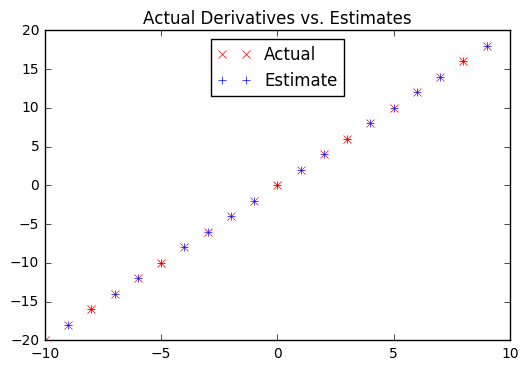

In [24]:
derivative_estimate = partial(difference_quotient, square, h=0.00001)

# plot to show that they are basically the same
x = range(-10,10)
plt.title("Actual Derivatives vs. Estimates")
plt.plot(x, map(derivative, x), 'rx', label='Actual')  # red x
plt.plot(x, map(derivative_estimate, x), 'b+', label='Estimate')  # blue +
plt.legend(loc=9)
plt.show()

When f is a function of many variables, it has multiple [partial derivatives](https://en.wikipedia.org/wiki/Partial_derivative), each indicating how f changes when we make small changes in just one of the input variables.  
We calculate its *i*th partial derivative by treating it a s a function of just its *i*th variable, holding the other variables fixed:

In [25]:
def partial_difference_quotient(f, v, i, h):
    """ compute the ith partial difference quotient of f at v """
    # add h to only the ith element of v
    w = [v_j + (h if j == i else 0) for j, v_j in enumerate(v)]
    return (f(w) - f(v)) / h

after which we can estimate the gradient the same way:

In [26]:
def estimate_gradient(f, v, h=0.00001):
    return [partial_difference_quotient(f, v, i, h) for i, _ in enumerate(v)]

**Note**  
A major drawback to this "estimate using difference quotients" approach is that it is computationally expensive.  
If <code>v</code> has length <code>n</code>, <code>estimate_gradient</code> has to evaluate <code>f</code> on 2<code>n</code> different inputs.  
If you are repeatedly estimating gradients, you are doing quite a bit of extra work.

## Using the Gradient